In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy
import matplotlib.ticker as ticker
import statsmodels.api as sm
import matplotlib.ticker as mtick


In [ ]:
Row_data = pd.read_csv(f'clean_backtest_data.csv')
data_use = Row_data.copy()
data_use['mdate'] = pd.to_datetime(data_use['mdate'])
data_use = data_use.rename(columns={
    'mdate': 'Date',
    'ROI': 'Ret',
    'coid': 'Symbol',
    'Close': 'ori_Close'
})

data_use['Close'] = data_use['ori_Close'] * data_use['Adjust_Factor']
data_use['Symbol'] = data_use['Symbol'].astype(str)
data_use.sort_values('Date')

/var/folders/st/lxg2kchn65x5y9ldzc2d4qgh0000gn/T/ipykernel_1947/3232798663.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  Row_data = pd.read_csv(f'clean_backtest_data.csv')


,Unnamed: 0,Symbol,Date,Low,Open,Ret,Market,ori_Close,Adjust_Factor,High,Volume_1000_Shares,Close
2454397,2454397,6223,2006-01-02,86.90,86.90,-0.2268,OTC,88.00,0.376654,88.30,330.0,33.145552
6455947,6455947,3056,2006-01-02,6.66,6.90,5.7576,TWSE,6.98,0.428995,7.06,127.0,2.994385
6131263,6131263,1538,2006-01-02,41.60,41.80,0.3584,TWSE,42.00,12.909883,42.50,2725.0,542.215086
3590554,3590554,6177,2006-01-02,11.90,11.90,0.0000,OTC,11.90,0.144673,11.90,1.0,1.721609
3193359,3193359,1787,2006-01-02,20.45,20.70,-1.2077,OTC,20.45,0.429597,20.70,7.0,8.785259
...,...,...,...,...,...,...,...,...,...,...,...,...
2542289,2542289,2908,2025-05-14,20.65,20.75,0.2410,TWSE,20.80,1.000000,20.80,585.0,20.800000
3408769,3408769,2915,2025-05-14,51.10,52.40,-1.7274,TWSE,51.20,1.000000,52.40,3197.0,51.200000
3850071,3850071,2610,2025-05-14,22.00,22.50,0.0000,TWSE,22.30,1.000000,22.50,35230.0,22.300000
6182800,6182800,3540,2025-05-14,31.40,31.40,7.6052,OTC,33.25,1.000000,33.50,809.0,33.250000


In [166]:
Row_data[Row_data['coid'] == '0050'].sort_values('mdate')

,Unnamed: 0,coid,mdate,Low,Open,ROI,Market,Close,Adjust_Factor,High,Volume_1000_Shares
131085,131085,0050,2019-06-19,79.95,80.00,2.3447,TWSE,80.75,0.828725,80.80,21832.0
131096,131096,0050,2019-06-20,80.65,80.75,0.1238,TWSE,80.85,0.828725,81.00,11581.0
131138,131138,0050,2019-06-21,80.80,81.10,0.0000,TWSE,80.85,0.828725,81.20,15343.0
131177,131177,0050,2019-06-24,80.70,80.80,0.4329,TWSE,81.20,0.828725,81.50,16600.0
131228,131228,0050,2019-06-25,80.60,81.15,-0.5542,TWSE,80.75,0.828725,81.40,7941.0
...,...,...,...,...,...,...,...,...,...,...,...
186700,186700,0050,2025-05-08,171.60,172.05,1.3208,TWSE,172.60,1.000000,173.20,10291.0
186755,186755,0050,2025-05-09,172.35,172.70,1.2457,TWSE,174.75,1.000000,174.95,13675.0
186787,186787,0050,2025-05-12,175.50,175.50,1.1159,TWSE,176.70,1.000000,177.00,14200.0
186831,186831,0050,2025-05-13,178.85,180.85,1.2168,TWSE,178.85,1.000000,181.10,21040.0


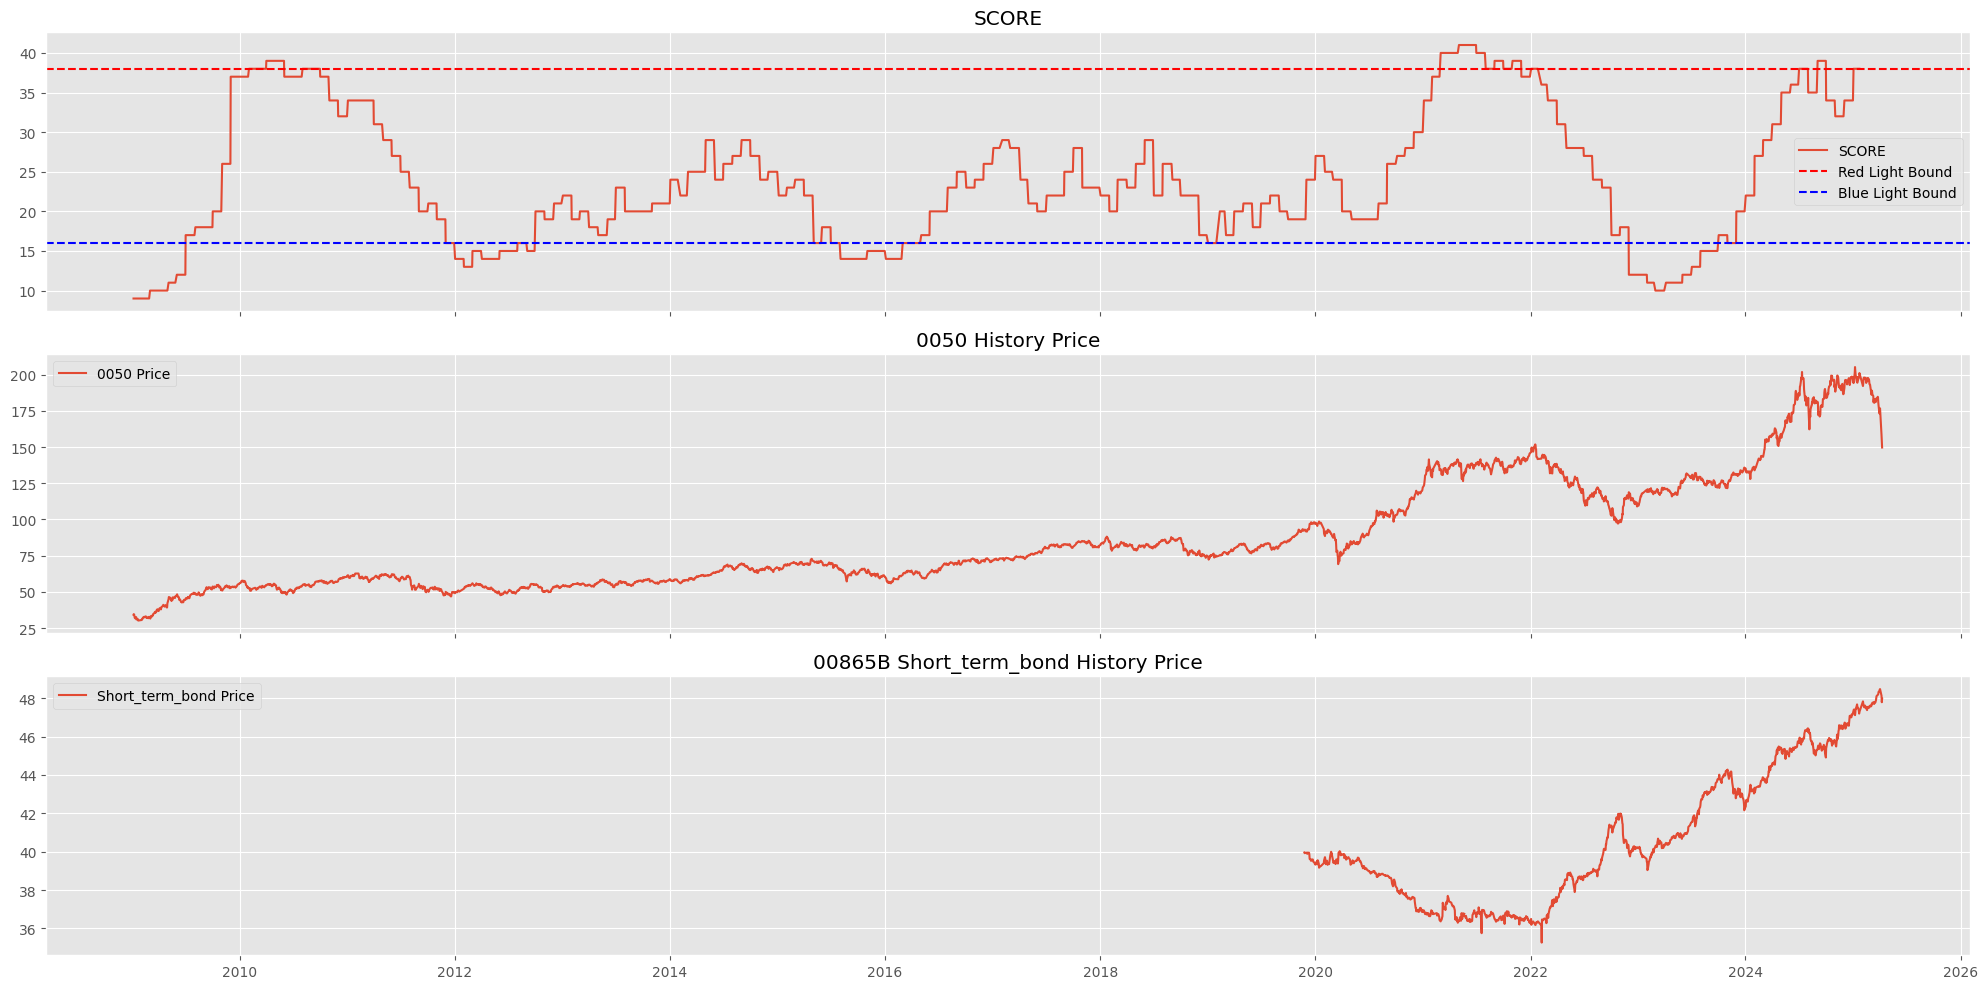

In [ ]:
df = pd.read_csv('/Users/nemo/Desktop/TQuant/eco_data.csv')
df['mdate'] = pd.to_datetime(df['mdate'])
df['mdate'] = df['mdate'].dt.strftime('%Y-%m-%d')
df['mdate'] = pd.to_datetime(df['mdate'])


fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 10), sharex=True)
plt.style.use('ggplot')
axes[1].plot(df['mdate'], df['avgclsd'], label = '0050 Price')
axes[1].set_title(f'0050 History Price')
axes[1].legend()

axes[0].plot(df['mdate'], df['val_shifted'], label = 'SCORE')
axes[0].axhline(y = 38, label = 'Red Light Bound', color = 'red', linestyle = '--')
axes[0].axhline(y= 16, label = 'Blue Light Bound', color = 'blue', linestyle = '--')
axes[0].set_title(f'SCORE')
axes[0].legend()

axes[2].plot(df['mdate'], df['avgclsd_bond'], label = 'Short_term_bond Price')
axes[2].set_title(f'00865B Short_term_bond History Price')
axes[2].legend()

plt.tight_layout()
plt.show()

In [212]:
# 最終 Backtest 版本 : 2025-05-15
class portfolio():
    def __init__(self, initial_cash):
        self.date = None

        # 起始為空
        self.ticker = []
        self.amount = {}
        self.price = {}

        self.cash = initial_cash 
        self.position_value = 0.0
        self.portfolio_value = self.cash + self.position_value
        self.position_data = {}
        self.leverage = 0.0

        self.state = False
        self.score = None
        self.a = 0

    def get_state(self):
        
        package = {
            'Date': self.date,
            'Ticker': self.ticker,
            'Price': self.price,
            'Amount': self.amount,
            'Cash': self.cash,
            'Position_value': self.position_value,
            'Portfolio_value': self.portfolio_value,
            'Leverage': self.leverage,
            'Position_data': self.position_data
        }
        return package

    def renew(self, Date, Price):
        self.date = Date
        self.price = Price

        #  ticker 改為由 amount 的 key 動態生成，避免漏掉新股票
        self.ticker = list(self.amount.keys())

        self.position_value = sum(self.price.get(i, 0) * self.amount.get(i, 0) for i in self.ticker)
        self.portfolio_value = self.cash + self.position_value

        self.leverage = (self.position_value / self.portfolio_value if self.portfolio_value != 0 else 0)
        self.position_data = {key: (self.price.get(key, 0) * self.amount.get(key, 0)) / self.portfolio_value if self.portfolio_value != 0 else 0 for key in self.ticker}

    def add_cash(self, reinvestment_money):
        self.cash += reinvestment_money

        self.portfolio_value = self.cash + self.position_value
        self.leverage = (self.position_value / self.portfolio_value if self.portfolio_value != 0 else 0)
        self.position_data = {key: (self.price.get(key, 0) * self.amount.get(key, 0)) / self.portfolio_value if self.portfolio_value != 0 else 0 for key in self.ticker}





class performance():

    def __init__(self):
        # 預先建立空的 DataFrame
        self.df = pd.DataFrame()

    def record(self, portfolio, **kwargs):
        row = copy.deepcopy(portfolio.get_state())
        row.update(kwargs)
        # 把最新一期的 portfolio 資料轉為 df 格式再去 concat 起來
        new_row = pd.DataFrame([row])
        self.df = pd.concat([self.df, new_row], ignore_index=True)

    def add_benchmark(self, symbol, data):
        self.df['Date'] = pd.to_datetime(self.df['Date'])
        benchmark_price_data = data.loc[data['Symbol'] == symbol, ['Date', 'Close']].copy()
        benchmark_price_data = benchmark_price_data.rename(columns = {'Close': 'Benchmark_Close'})
        benchmark_price_data['Date'] = pd.to_datetime(benchmark_price_data['Date'])

        self.df = pd.merge(self.df, benchmark_price_data, on = 'Date', how = 'left')


    def compute_perf(self):
        """缺少 最大回撤"""
        self.df['Strategy_return'] = self.df['Portfolio_value'].pct_change().fillna(0)
        self.df['Strategy_cumulative_return'] = (1 + self.df['Strategy_return']).cumprod() - 1
        self.df['Benchmark_return'] = self.df['Benchmark_Close'].pct_change().fillna(0)
        self.df['Benchmark_cumulative_return'] = (1 + self.df['Benchmark_return']).cumprod() - 1
        self.df['Drawdown'] = self.df['Strategy_cumulative_return'] - self.df['Strategy_cumulative_return'].cummax()
        self.df['Leverage'] = self.df['Position_value'] / self.df['Portfolio_value']

        scale_factor = self.df['Benchmark_return'].std() / self.df['Strategy_return'].std()
        self.df['Vol_match_return'] = self.df['Strategy_return'] * scale_factor
        self.df['Vol_match_cumulative_return'] = (1 + self.df['Vol_match_return']).cumprod() - 1

        self.position_df = pd.json_normalize(self.df['Position_data'])
        self.position_df.index = self.df['Date'].dt.strftime('%Y-%m-%d')

    def compute_stat(self, risk_free_rate = 0.0):
        """計算基本統計量：累積報酬率 年化報酬 年化波動度 夏普值 卡碼比率 beta alpha....."""
        
        total_return = (1 + self.df['Strategy_return']).prod() - 1
        annual_return = (1 + total_return) ** (252 / len(self.df['Strategy_return'])) - 1
        annual_volatility = self.df['Strategy_return'].std() * (252 ** 0.5)

        benchmark_return = (1 + self.df['Benchmark_return']).prod() - 1
        benchmark_annual_return = (1 + benchmark_return) ** (252 / len(self.df['Benchmark_return'])) - 1
        benchmark_annual_volatility = self.df['Benchmark_return'].std() * (252 ** 0.5)

        sharpe_ratio = (annual_return - risk_free_rate) / annual_volatility if annual_volatility > 0 else float('nan')
        max_drawdown = self.df['Drawdown'].min()
        calmar_ratio = (annual_return / abs(max_drawdown)) if max_drawdown != 0 else float('nan')

        X = sm.add_constant(self.df['Benchmark_return'])
        model = sm.OLS(self.df['Strategy_return'], X).fit()
        alpha = model.params['const'] * 252  # 年化 alpha
        beta = model.params[self.df['Benchmark_return'].name]

        # 統計結果彙整
        self.stats = {
            '累積報酬率': round(total_return, 4),
            '年化報酬率': round(annual_return, 4),
            '年化波動度': round(annual_volatility, 4),
            '夏普比率': round(sharpe_ratio, 4),
            '最大回撤': round(max_drawdown, 4),
            'Calmar比率': round(calmar_ratio, 4),
            'Alpha (年化)': round(alpha, 4),
            'Beta': round(beta, 4),
            'Benchmark 累積報酬率': round(benchmark_return, 4),
            'Benchmark 年化報酬率': round(benchmark_annual_return, 4),
            'Benchmark 年化波動度': round(benchmark_annual_volatility, 4)
            }

        return self.stats

    
    def nemofolio(self):
        """畫出全部的圖片"""
        self.df = self.df.sort_values('Date')
        fig, axes = plt.subplots(nrows=9, ncols=1, figsize=(18, 40), sharex=False)
        fig.suptitle("Backtest_Results", fontsize=20, y = 1.0)
        plt.style.use('ggplot')
        axes[0].plot(self.df['Date'], self.df['Strategy_cumulative_return'], label = 'Strategy')
        axes[0].plot(self.df['Date'], self.df['Benchmark_cumulative_return'], label = 'Benchmark')
        axes[0].set_title(f"Strategy Cumulative Return")
        axes[0].legend()
        axes[0].xaxis.set_major_locator(ticker.MaxNLocator(10))

        axes[1].plot(self.df['Date'], self.df['Vol_match_cumulative_return'], label = 'Strategy')
        axes[1].plot(self.df['Date'], self.df['Benchmark_cumulative_return'], label = 'Benchmark')
        axes[1].set_title(f"Strategy Cumulative Return Matched Volatility")
        axes[1].legend()
        axes[1].xaxis.set_major_locator(ticker.MaxNLocator(10))

        axes[2].plot(self.df['Date'], self.df['Drawdown'])
        axes[2].fill_between(
                    self.df['Date'],
                    self.df['Drawdown'],
                    0,
                    where=(self.df['Drawdown'] < 0),
                    interpolate=True,
                    color='red',
                    alpha=0.3,
                    label='Drawdown Area'
                )
        axes[2].set_title(f'Drawdown Chart')
        axes[2].xaxis.set_major_locator(ticker.MaxNLocator(10))

        axes[3].plot(self.df['Date'], self.df['Leverage'])
        axes[3].yaxis.get_major_formatter().set_useOffset(False)
        axes[3].yaxis.get_major_formatter().set_scientific(False)
        axes[3].set_title(f"Leverage")
        axes[3].xaxis.set_major_locator(ticker.MaxNLocator(10))

        # Position Value
        axes[4].bar(self.df['Date'], self.df['Position_value'], width=1)
        axes[4].set_title('Position Value')
        axes[4].axhline(y=0, linestyle='--', color='g', alpha=0.5)
        axes[4].xaxis.set_major_locator(ticker.MaxNLocator(10))

        # Portfolio Value
        axes[5].bar(self.df['Date'], self.df['Portfolio_value'], width=1)
        axes[5].set_title('Portfolio Value')
        axes[5].axhline(y=0, linestyle='--', color='g', alpha=0.5)
        axes[5].xaxis.set_major_locator(ticker.MaxNLocator(10))

        # Cash Level
        axes[6].bar(self.df['Date'], self.df['Cash'], width=1)
        axes[6].set_title('Cash Level')
        axes[6].axhline(y=0, linestyle='--', color='g', alpha=0.5)
        axes[6].xaxis.set_major_locator(ticker.MaxNLocator(10))

        axes[7].plot(self.df['Date'], self.df['Strategy_return'])
        axes[7].set_title('Period Return')
        axes[7].xaxis.set_major_locator(ticker.MaxNLocator(10))

        for i in self.position_df.columns:
            axes[8].plot(self.position_df.index, self.position_df[i], label = i)
        axes[8].set_title('Position Data')
        axes[8].legend()
        axes[8].xaxis.set_major_locator(ticker.MaxNLocator(10))

        plt.tight_layout()
        plt.show()



class Market:
    def __init__(self):
        self.price_data = {}

    def update_prices_from_df(self, df: pd.DataFrame, date_col: str = 'Date', price_col: str = 'Close', target_date=None):
        """
        根據目標日期，從 DataFrame 擷取當天所有股票的收盤價。
        - df: 包含股票、收盤價、日期的 DataFrame
        - date_col: 日期欄位名稱
        - price_col: 收盤價欄位名稱
        - target_date: 欲擷取的日期
        """

        # 篩選出當天資料
        df_today = df[df[date_col] == target_date]
        

        if df_today.empty:
            print(f"⚠️ {target_date} 無交易資料（可能是非交易日），price_data 未更新")
            return
        

        # 更新價格資料到 price_data 字典中
        self.price_data = dict(zip(df_today['Symbol'], df_today[price_col]))

    def get_price_dict_for_tickers(self, tickers: list):
        """
        從 self.price_data 擷取指定股票代號的價格字典。
        """
        return {ticker: self.price_data.get(ticker, None) for ticker in tickers}

    def get_price(self, symbol):
        return self.price_data.get(symbol, None)



def order(portfolio, symbol, target, Market):
    context = portfolio.get_state()
    position = context['Position_data'].get(symbol, 0.0)

    if abs(position - target) < 0.0005:
        return
    
    now_price = Market.get_price(symbol)

    #  加入價格缺失防呆機制
    if now_price is None or now_price == 0:
        print(f"⚠️ {context.get('Date')}略過下單：{symbol} 在當日沒有價格資料")
        return
    
    target_pos = target - position
    use_money = target_pos * portfolio.portfolio_value

    add_amount = int(use_money / now_price)
    cost = add_amount * now_price
    
    portfolio.amount[symbol] = portfolio.amount.get(symbol, 0.0) + add_amount
    portfolio.cash -= (cost)
    portfolio.position_value += cost
    portfolio.position_data[symbol] = position + target_pos
    portfolio.portfolio_value =  portfolio.cash + portfolio.position_value
    portfolio.leverage = portfolio.position_value / portfolio.portfolio_value 
    if symbol not in portfolio.ticker:
        portfolio.ticker.append(symbol) 

    return



def run_backtest(data, strategy_function, start_date, end_date, Benchmark_code = 'IR0001', factor_data = None, initial_cash = 1_000_000):
    context = portfolio(initial_cash = initial_cash)
    perf = performance()
    mkt = Market()

    data['Symbol'] = data['Symbol'].astype(str)
    data['Date'] = pd.to_datetime(data['Date'])
    #  過濾時間資料
    if start_date is not None:
        if end_date is not None:
            start_date = pd.to_datetime(start_date)
            end_date = pd.to_datetime(end_date)
            data = data[data['Date'] >= start_date].copy()
            data = data[data['Date'] <= end_date].copy()

    data = data.sort_values('Date')
    backtest_dates = sorted(data['Date'].dt.strftime('%Y-%m-%d').unique())

    print(f'--'*25,'Strategy Logic Start','--'*25)

    for idx, date in enumerate(backtest_dates):
        # 更新市場資訊（收盤價格）
        mkt.update_prices_from_df(df=data, target_date=date)
        # ================================= 交易邏輯 開始 ===================================

        strategy_function(idx, date, context, perf, mkt, factor_data)

        # ================================= 交易邏輯 結束 ===================================
        # 更新與紀錄
        new_price = mkt.get_price_dict_for_tickers(tickers=context.ticker)
        context.renew(Date=date, Price=new_price)
        perf.record(portfolio=context)

    print(f'--'*25,'Strategy Logic End','--'*25)

    perf.df = perf.df.sort_values('Date')
    perf.add_benchmark(symbol = Benchmark_code, data = data)
    perf.compute_perf()

    return perf


-------------------------------------------------- Strategy Logic Start --------------------------------------------------
進入景氣循環
2019-07-01
2021-02-26 離開股市
2022-11-30 進入股市
2024-06-28 離開股市
-------------------------------------------------- Strategy Logic End --------------------------------------------------
                 指標      數值
0             累積報酬率  6.0849
1             年化報酬率  0.4131
2             年化波動度  0.2674
3              夏普比率  1.5445
4              最大回撤 -0.8123
5          Calmar比率  0.5085
6        Alpha (年化)  0.2444
7              Beta  0.7736
8   Benchmark 累積報酬率  1.4574
9   Benchmark 年化報酬率  0.1721
10  Benchmark 年化波動度  0.1935


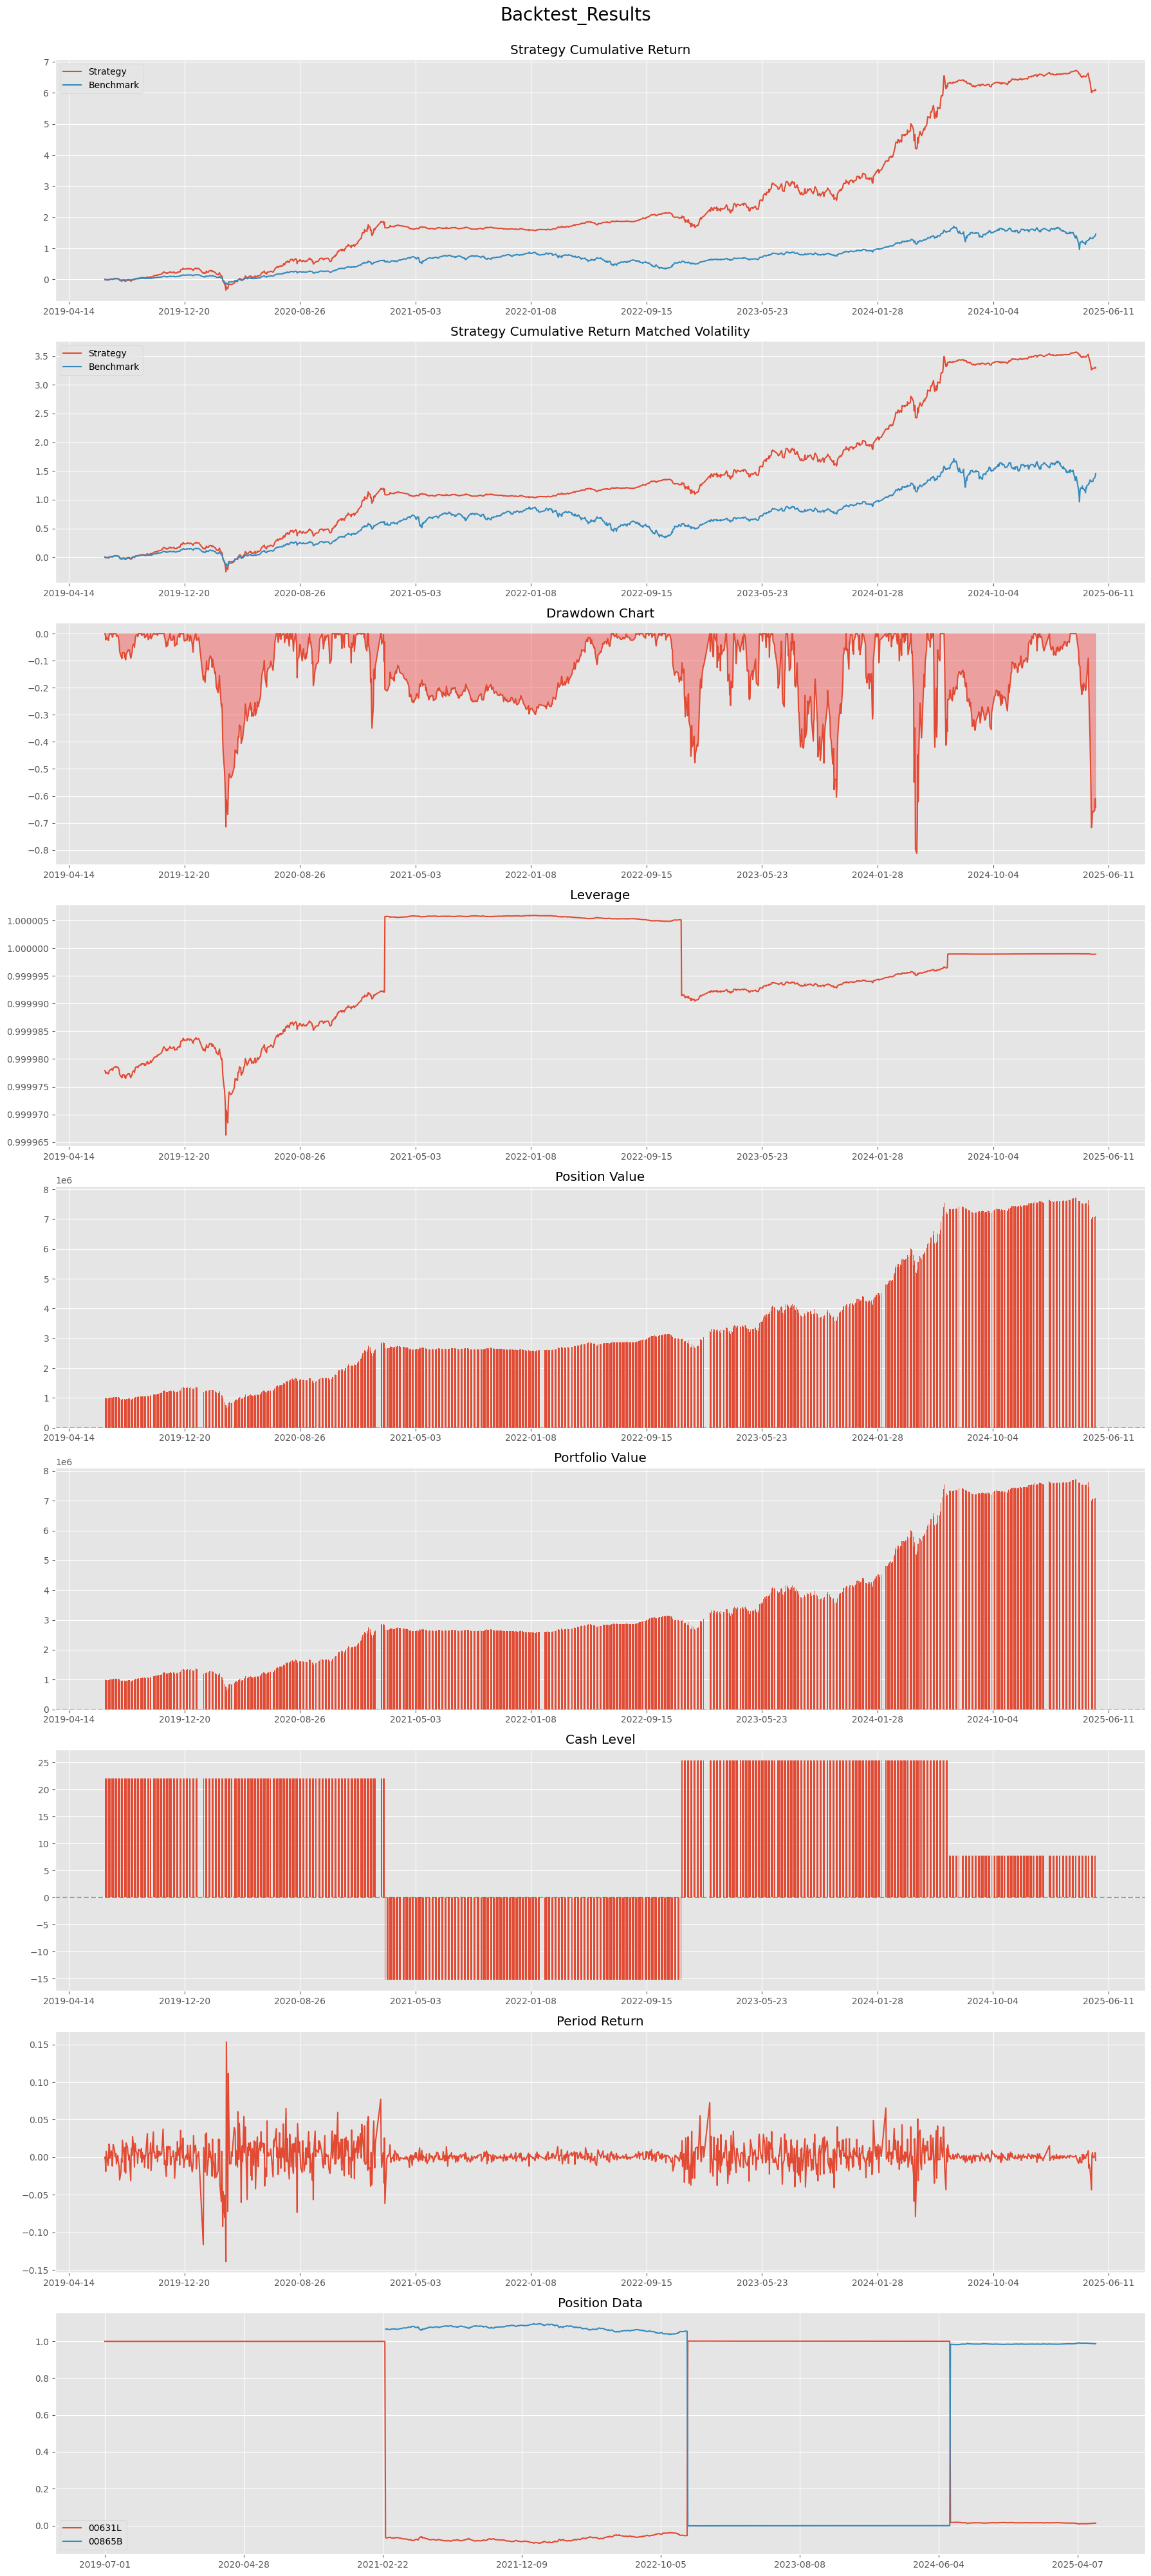

In [213]:
# 策略邏輯
def logic(idx, date, portfolio, performance, market, factor_data):

    today_data = factor_data[factor_data['mdate'].shift(1) == pd.to_datetime(date)]
    portfolio.last_score = portfolio.score  

    if not today_data.empty:
        portfolio.score = today_data['val_shifted'].iloc[-1]
    else:
        # 若無資料，就沿用舊的 score
        portfolio.score = portfolio.last_score

    if portfolio.score <= 16 and portfolio.state == False:
        
        order(portfolio=portfolio, symbol='00865B', target=0.0, Market=market)
        #order(portfolio=portfolio, symbol='0050', target=0.5, Market=market)
        order(portfolio=portfolio, symbol='00631L', target=1.0, Market=market)
        
        print(f'{date} 進入股市')
        portfolio.state = True

    if portfolio.score >= 38 and portfolio.state == True:
        order(portfolio=portfolio, symbol='00631L', target=0.0, Market=market)
        #order(portfolio=portfolio, symbol='0050', target=0.0, Market=market)
        order(portfolio=portfolio, symbol='00865B', target=1.0, Market=market)
        print(f'{date} 離開股市')
        portfolio.state = False

    if portfolio.score > 16 and portfolio.score < 38 and portfolio.a == 0:
        portfolio.a = 1
        print('進入景氣循環')
        if portfolio.state == False:
            print(date)
            #order(portfolio=portfolio, symbol='0050', target=0.5, Market=market)
            order(portfolio=portfolio, symbol='00631L', target=1.0, Market=market)
            portfolio.state = True



result = run_backtest(data = data_use, 
                      strategy_function = logic,
                      start_date = '2019-07-01', 
                      end_date = '2025-05-14',
                      factor_data=df,
                      Benchmark_code='IR0001')


stat = pd.DataFrame(result.compute_stat().items(), columns=["指標", "數值"])
print(stat)


result.nemofolio()



-------------------------------------------------- Strategy Logic Start --------------------------------------------------
2020-07-02 : 調整股票比例
2020-08-03 : 調整股票比例
2020-09-02 : 調整股票比例
2020-10-06 : 調整股票比例
2020-11-06 : 調整股票比例
2020-12-08 : 調整股票比例
2021-01-08 : 調整股票比例
2021-02-18 : 調整股票比例
2021-03-23 : 調整股票比例
2021-04-26 : 調整股票比例
2021-05-27 : 調整股票比例
2021-06-29 : 調整股票比例
2021-07-29 : 調整股票比例
2021-08-30 : 調整股票比例
2021-10-01 : 調整股票比例
2021-11-03 : 調整股票比例
2021-12-03 : 調整股票比例
2022-01-05 : 調整股票比例
2022-02-15 : 調整股票比例
2022-03-18 : 調整股票比例
2022-04-21 : 調整股票比例
2022-05-24 : 調整股票比例
2022-06-24 : 調整股票比例
2022-07-26 : 調整股票比例
2022-08-25 : 調整股票比例
2022-09-27 : 調整股票比例
2022-10-28 : 調整股票比例
2022-11-29 : 調整股票比例
2022-12-29 : 調整股票比例
2023-02-10 : 調整股票比例
2023-03-16 : 調整股票比例
2023-04-20 : 調整股票比例
2023-05-23 : 調整股票比例
2023-06-26 : 調整股票比例
2023-07-26 : 調整股票比例
2023-08-28 : 調整股票比例
2023-09-27 : 調整股票比例
2023-11-01 : 調整股票比例
2023-12-01 : 調整股票比例
2024-01-03 : 調整股票比例
2024-02-02 : 調整股票比例
2024-03-15 : 調整股票比例
2024-04-18 : 調整股票比例
2024-05-21 : 調整股票

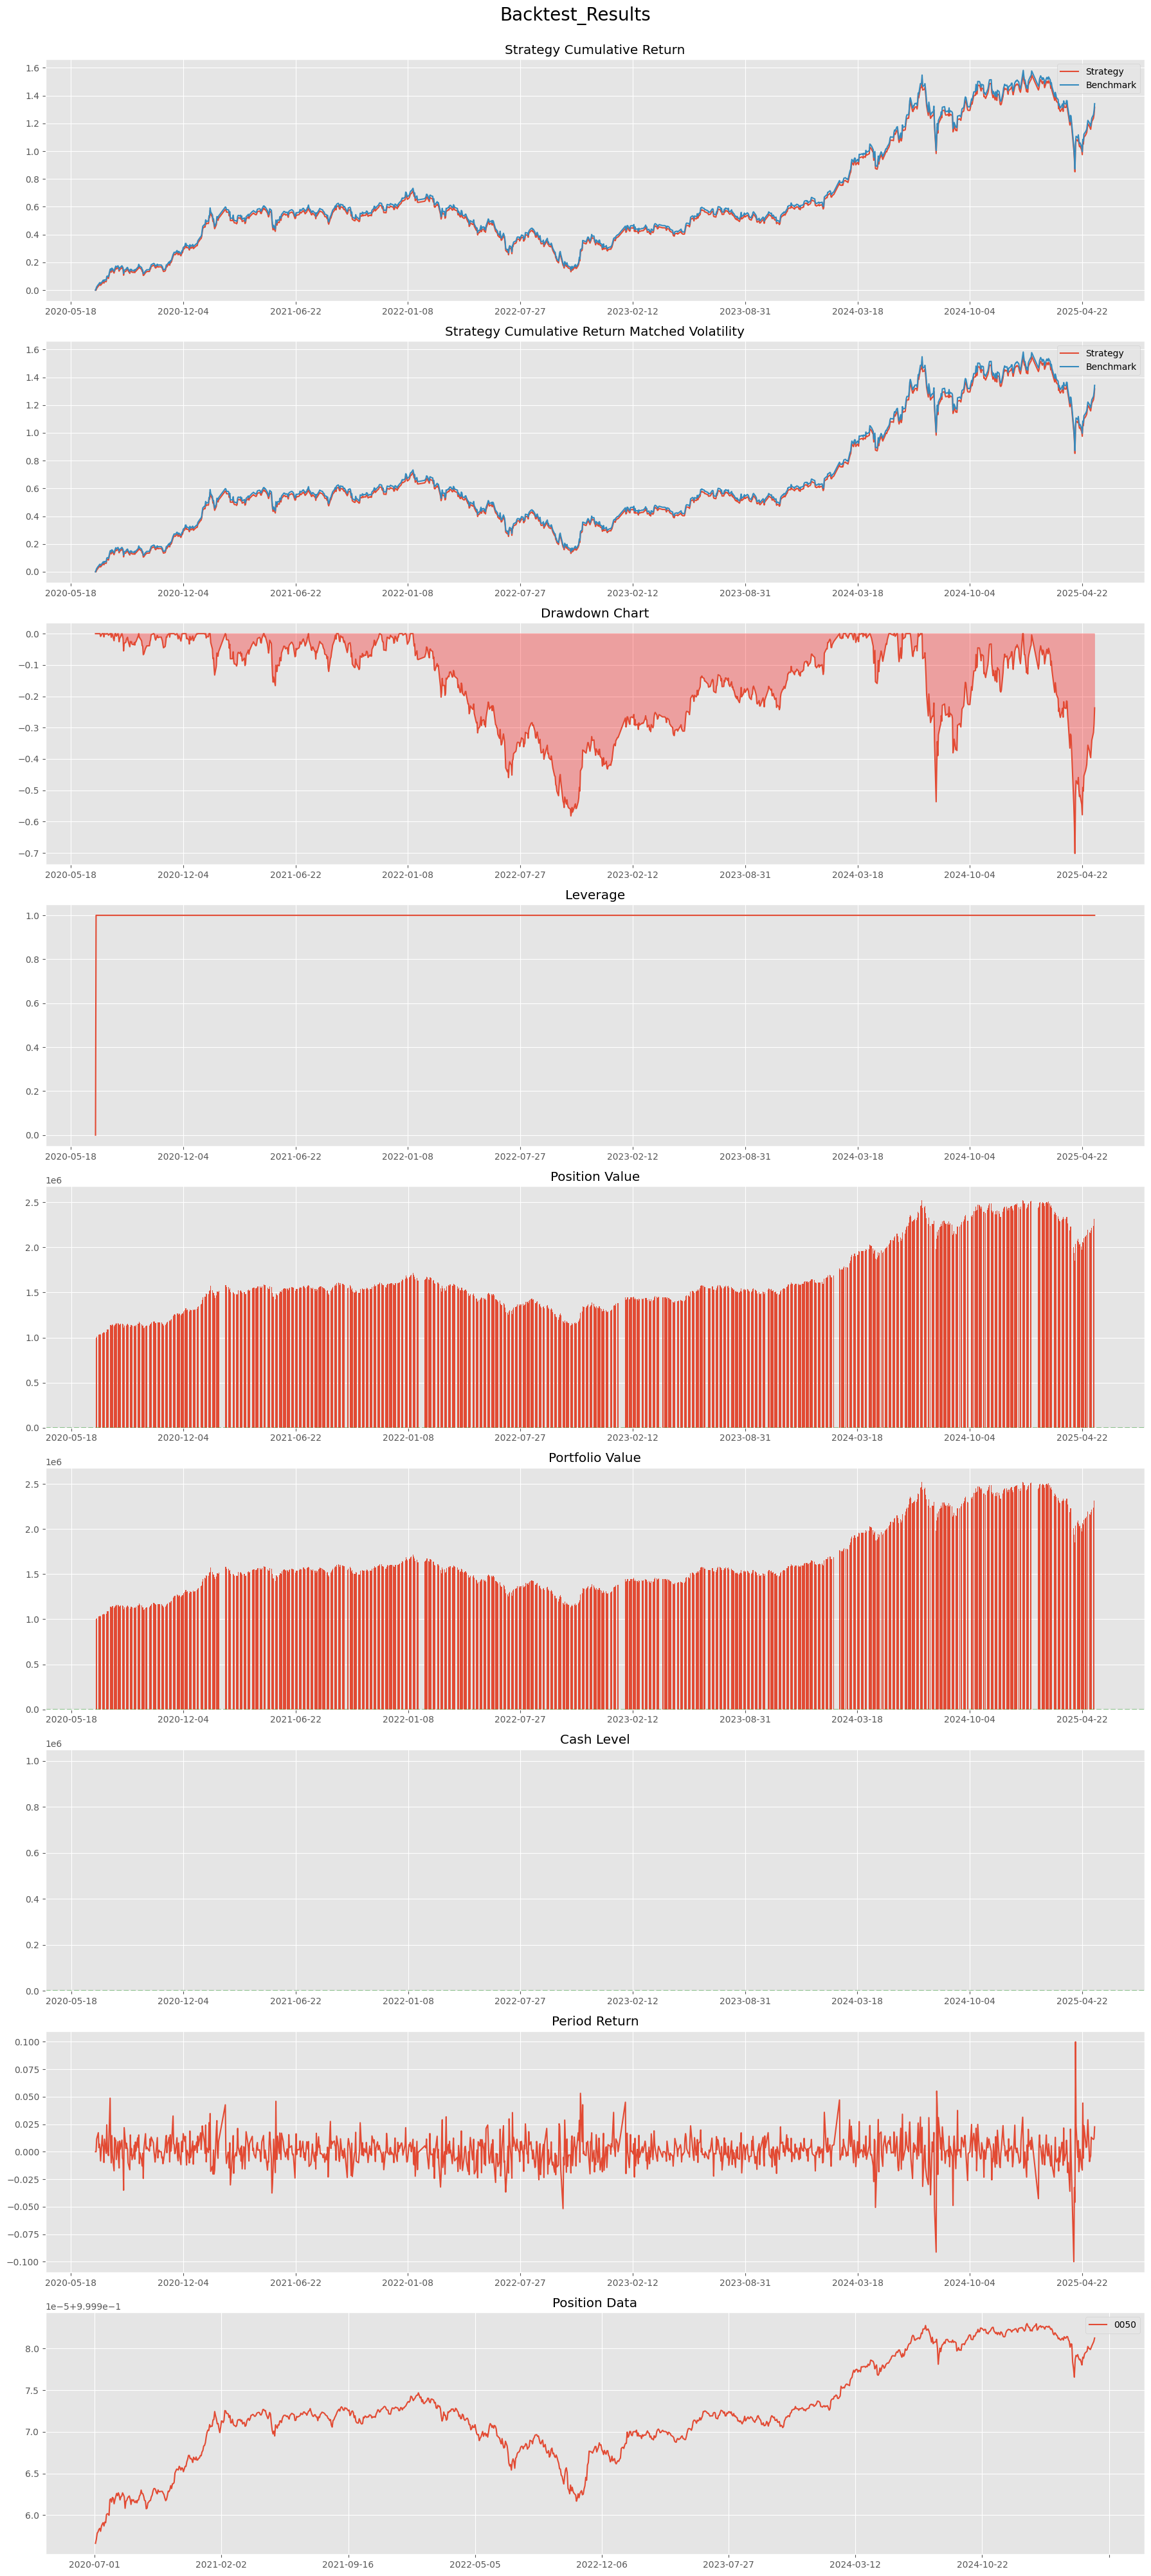

In [215]:
# 策略邏輯
def logic_2(idx, date, portfolio, performance, market, factor_data):




    if idx % 22 == 1:
        order(portfolio=portfolio, symbol='0050', target=1.0, Market=market)

        print(f'{date} : 調整股票比例')




result = run_backtest(data = data_use, 
                      strategy_function = logic_2,
                      start_date = '2020-07-01', 
                      end_date = '2025-05-14',
                      factor_data=None,
                      Benchmark_code='0050',
                      initial_cash=1_000_000)


stat = pd.DataFrame(result.compute_stat().items(), columns=["指標", "數值"])
print(stat)


result.nemofolio()

In [216]:
result.df

,Date,Ticker,Price,Amount,Cash,Position_value,Portfolio_value,Leverage,Position_data,Benchmark_Close,Strategy_return,Strategy_cumulative_return,Benchmark_return,Benchmark_cumulative_return,Drawdown,Vol_match_return,Vol_match_cumulative_return
0,2020-07-01,[],{},{},1000000.000000,0.000000e+00,1.000000e+06,0.000000,{},78.097608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2020-07-02,[0050],{'0050': 78.9605655},{'0050': 12664.0},43.398508,9.999566e+05,1.000000e+06,0.999957,{'0050': 0.999956601492},78.960566,0.000000,0.000000,0.011050,0.011050,0.000000,0.000000,0.000000
2,2020-07-03,[0050],{'0050': 79.86667034999999},{'0050': 12664.0},43.398508,1.011432e+06,1.011475e+06,0.999957,{'0050': 0.9999570938364434},79.866670,0.011475,0.011475,0.011475,0.022652,0.000000,0.011478,0.011478
3,2020-07-06,[0050],{'0050': 81.24740155},{'0050': 12664.0},43.398508,1.028917e+06,1.028960e+06,0.999958,{'0050': 0.9999578229598236},81.247402,0.017287,0.028960,0.017288,0.040331,0.000000,0.017292,0.028968
4,2020-07-07,[0050],{'0050': 81.5494365},{'0050': 12664.0},43.398508,1.032742e+06,1.032785e+06,0.999958,{'0050': 0.9999579791645193},81.549436,0.003717,0.032785,0.003717,0.044199,0.000000,0.003718,0.032794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,2025-05-08,[0050],{'0050': 172.6},{'0050': 12664.0},43.398508,2.185806e+06,2.185850e+06,0.999980,{'0050': 0.999980145704417},172.600000,0.013208,1.185850,0.013208,1.210055,-0.367426,0.013211,1.186248
1180,2025-05-09,[0050],{'0050': 174.75},{'0050': 12664.0},43.398508,2.213034e+06,2.213077e+06,0.999980,{'0050': 0.999980389972791},174.750000,0.012456,1.213077,0.012457,1.237585,-0.340198,0.012460,1.213488
1181,2025-05-12,[0050],{'0050': 176.70000000000002},{'0050': 12664.0},43.398508,2.237729e+06,2.237772e+06,0.999981,{'0050': 0.9999806063780626},176.700000,0.011159,1.237772,0.011159,1.262553,-0.315503,0.011162,1.238194
1182,2025-05-13,[0050],{'0050': 178.85000000000002},{'0050': 12664.0},43.398508,2.264956e+06,2.265000e+06,0.999981,{'0050': 0.9999808395091122},178.850000,0.012167,1.265000,0.012168,1.290083,-0.288276,0.012171,1.265434
